In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
#Lets import important libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
#Fetching file into a dataframe
df = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [4]:
#Lets understand data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Salary column has 67 null values .Need to fix this.Lets replace null values by 0.

In [7]:
df['salary'].fillna(0,inplace = True)

In [8]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Now our data is preprocessed and ready for exploration.

In [9]:
#Count of males and females in data
df_gender_analysis =  df[['gender','status']].groupby(['gender'], as_index = False).count()
df_gender_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['gender'],as_index = False).count()
df_gender_analysis['Placed'] = df_gender_analysis1['status']
df_gender_analysis['Placed_Percent'] = df_gender_analysis['Placed']/df_gender_analysis['status']*100
df_gender_analysis.rename(columns = {'gender':'Gender' , 'status':'Total_Students'})

,Gender,Total_Students,Placed,Placed_Percent
0,F,76,48,63.157895
1,M,139,100,71.942446


Percentage of Male students is more than that of Females .
Male students got placed more as compared to females.

In [10]:
#Salary analysis by gender
df_gender_analysis2 = df[['gender','salary']].groupby(['gender'],as_index = False).mean()
df_gender_analysis2

,gender,salary
0,F,168815.789474
1,M,215043.165468


Here we can see that male students have more mean salary as compared to females 

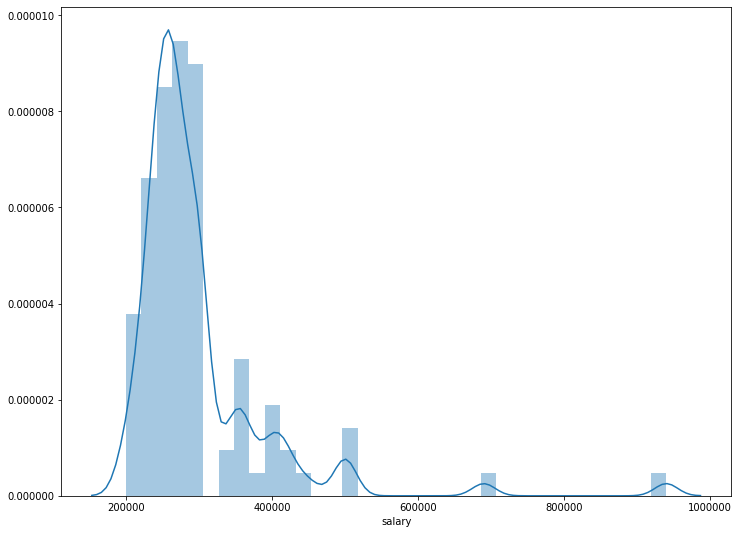

In [11]:
#Lets see salary distribution  
plt.figure(figsize=(12,9))
df_male = df.loc[df['gender'] == 'M']
ax = sns.distplot(df_male['salary'].loc[df['salary']!=0])
ax.ticklabel_format(style = 'plain')
plt.show()

Mostly people got salaries in between 200k to 400k.

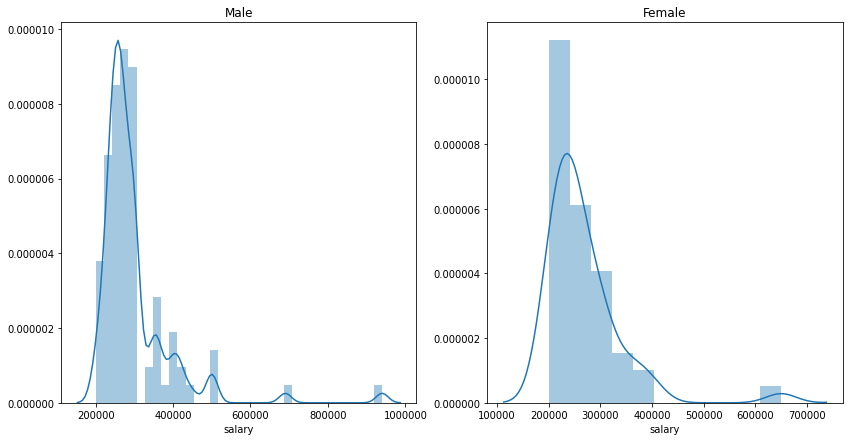

In [12]:
#Lets see salary distribution by gender.
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")
plt.show()

Deviation is less for males than compared to females which means most people get salary close to mean salary.

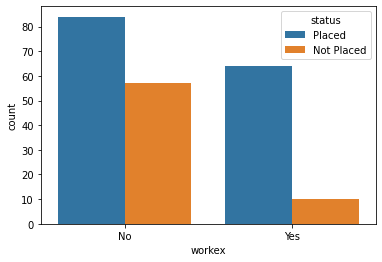

In [13]:
sns.countplot(x = 'workex' , data =df , hue = 'status')

From the graph there is huge difference between placed count and unplaced for people having work expereince.That means with work experience you are more likely to get placed as compared to wth no work experience.Work Experience is an imortant factor for your placement.It increases your chances of getting a placement.Now lets see the impact of work experience on salary.

In [14]:
#Lets see mean salaries for workex and no workex
df[['workex','salary']].groupby(['workex']).mean()

,salary
workex,
No,165333.333333
Yes,262283.783784


Work ex mean salary is higher as expected

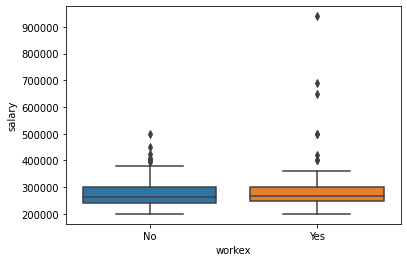

In [15]:
sns.boxplot(x = 'workex' , y = 'salary' , data=df.loc[df['status'] == 'Placed'])

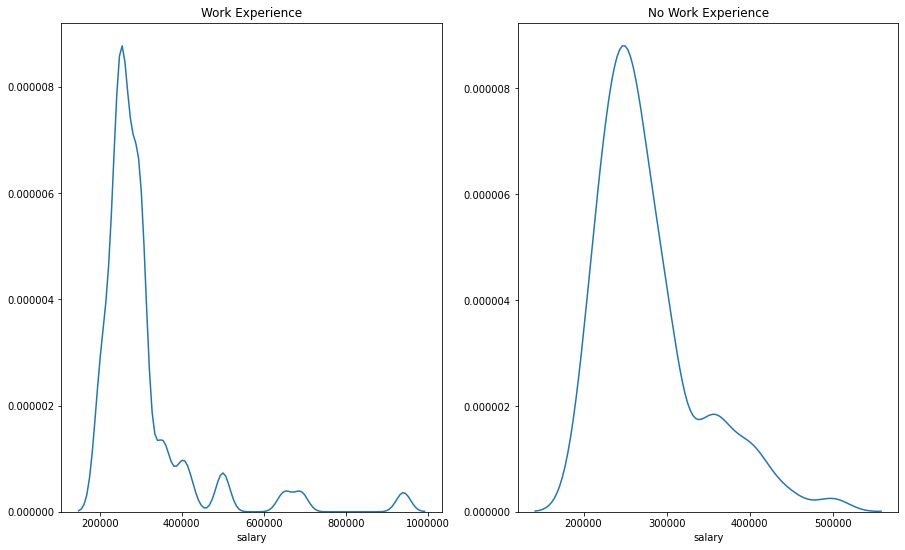

In [16]:
figure , ax = plt.subplots(1,2 , figsize = (15,9))
df1 = df.loc[df['status'] == 'Placed']
sns.distplot(df1.loc[df['workex'] == 'Yes']['salary'] ,hist = False,ax = ax[0])
ax[0].set_title("Work Experience")
sns.distplot(df1.loc[df['workex'] == 'No']['salary']  , hist = False , ax = ax[1])
ax[1].set_title("No Work Experience")
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')

Workex people have higher salaries as compared to no work experience.Hence we can say with work experience you can get a placement with more salary than with no work experience.

Lets see placement numbers for people from different ssc boards

In [17]:
df_boards_analysis =  df[['ssc_b','status']].groupby(['ssc_b'], as_index = False).count()
df_boards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['ssc_b'],as_index = False).count()
df_boards_analysis['Placed'] = df_boards_analysis1['status']
df_boards_analysis['Placed_Percent'] = df_boards_analysis['Placed']/df_boards_analysis['status']*100
df_boards_analysis.rename(columns = {'ssc_b':'SSC_Board' , 'status':'Total_Students'})

,SSC_Board,Total_Students,Placed,Placed_Percent
0,Central,116,78,67.241379
1,Others,99,70,70.707071


There is not much difference in placed percent so sscboard does not play an important role in deciding placement status.

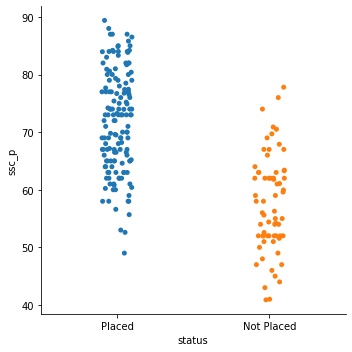

In [18]:
sns.catplot(x = 'status' , y = 'ssc_p' , data = df )

Students who have more ssc percentage got placement .People below 50% were unplaced .

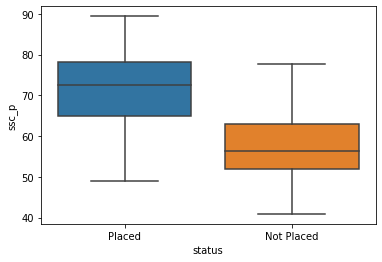

In [19]:
sns.boxplot(x = 'status' , y = 'ssc_p' , data = df )

We can see the same thing in box plot more clearly that ssc percentage influences placement

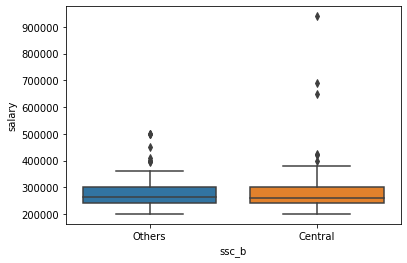

In [20]:
sns.boxplot(x = 'ssc_b' , y = 'salary' , data = df.loc[df['status']=='Placed'])

Salaries are not that impacted from your ssc board . Although there are some outliers in central higher than others

In [21]:
df_hscboards_analysis =  df[['hsc_b','status']].groupby(['hsc_b'], as_index = False).count()
df_hscboards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_b'],as_index = False).count()
df_hscboards_analysis['Placed'] = df_hscboards_analysis1['status']
df_hscboards_analysis['Placed_Percent'] = df_hscboards_analysis['Placed']/df_hscboards_analysis['status']*100
df_hscboards_analysis.rename(columns = {'hsc_b':'HSC_Board' , 'status':'Total_Students'})

,HSC_Board,Total_Students,Placed,Placed_Percent
0,Central,84,57,67.857143
1,Others,131,91,69.465649


Same for hsc board it doesnt have much impact on placement as it is almost same for both boards.

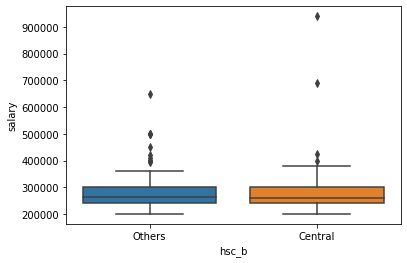

In [22]:
sns.boxplot(x = 'hsc_b' , y = 'salary' , data = df.loc[df['status']== 'Placed'] )

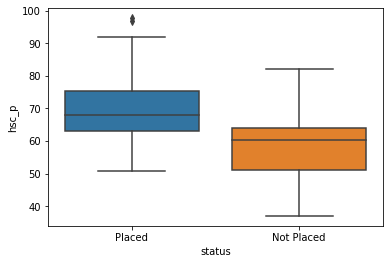

In [23]:
sns.boxplot(x = 'status' , y = 'hsc_p' , data = df )

HSc percentage is also impacting placement . More the value more likely the student is getting a placement.

In [24]:
df_hscsubject_analysis =  df[['hsc_s','status']].groupby(['hsc_s'], as_index = False).count()
df_hscsubject_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_s'],as_index = False).count()
df_hscsubject_analysis['Placed'] = df_hscsubject_analysis1['status']
df_hscsubject_analysis['Placed_Percent'] = df_hscsubject_analysis['Placed']/df_hscsubject_analysis['status']*100
df_hscsubject_analysis.rename(columns = {'hsc_s':'HSC_subject' , 'status':'Total_Students'})

,HSC_subject,Total_Students,Placed,Placed_Percent
0,Arts,11,6,54.545455
1,Commerce,113,79,69.911504
2,Science,91,63,69.230769


Students from commerce and sccience background got more placements than arts.We can say HSC subject also has somewhat impact on placement

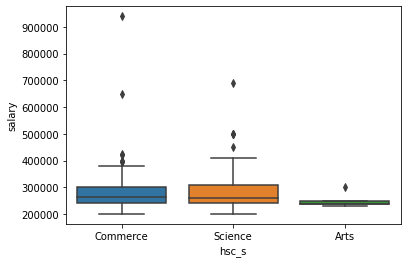

In [25]:
sns.boxplot(x = 'hsc_s' , y = 'salary' , data = df.loc[df['status']== 'Placed'] )

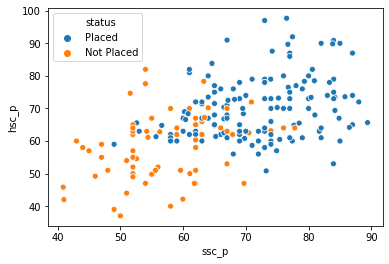

In [26]:
sns.scatterplot(x = 'ssc_p', y = 'hsc_p' , data =df , hue = 'status')

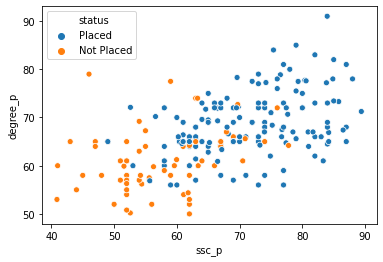

In [27]:
sns.scatterplot(x = 'ssc_p', y = 'degree_p' , data =df , hue = 'status')

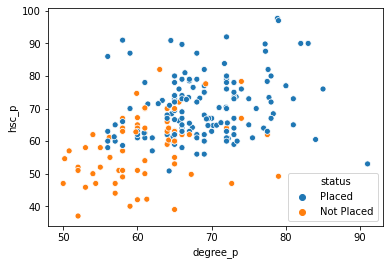

In [28]:
sns.scatterplot(x = 'degree_p', y = 'hsc_p' , data =df , hue = 'status')

people having more percentage tend to get placed than compared to unplaced.Be it in ssc , hsc or degree.Percentage matters for placement.

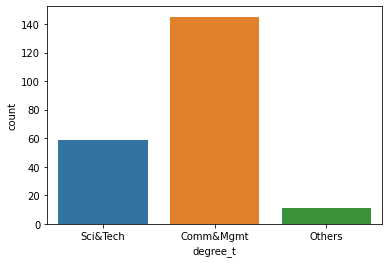

In [29]:
sns.countplot(x='degree_t' , data =df )

If you see there is majority of people from commerce background .

In [30]:
df_degree_analysis =  df[['degree_t','status']].groupby(['degree_t'], as_index = False).count()
df_degree_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['degree_t'],as_index = False).count()
df_degree_analysis['Placed'] = df_degree_analysis1['status']
df_degree_analysis['Placed_Percent'] = df_degree_analysis['Placed']/df_degree_analysis['status']*100
df_degree_analysis.rename(columns = {'degree_t':'Degree_Stream' , 'status':'Total_Students'})

,Degree_Stream,Total_Students,Placed,Placed_Percent
0,Comm&Mgmt,145,102,70.344828
1,Others,11,5,45.454545
2,Sci&Tech,59,41,69.491525


People from Science and Commerce have got the highest placements as compared to others.So Degree  Stream does affect the placement

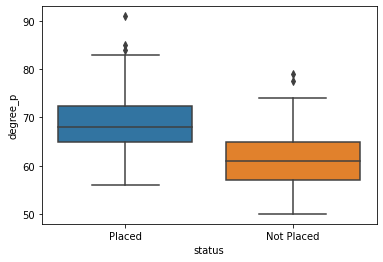

In [31]:
sns.boxplot(x = 'status' , y = 'degree_p' , data = df )

More the degree percentage more is the probability of placement.

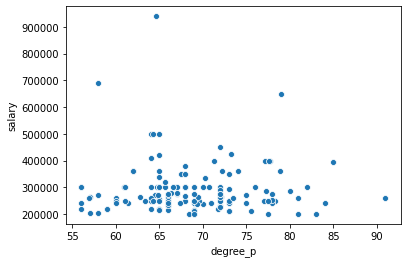

In [32]:
sns.scatterplot(x = 'degree_p' , y= 'salary' , data = df.loc[df['salary'] != 0])

We don't see any strong relation in degree_p and salary !!


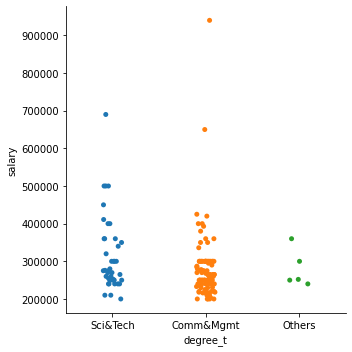

In [33]:
sns.catplot(x = 'degree_t' , y = 'salary' , data = df.loc[df['salary'] != 0])

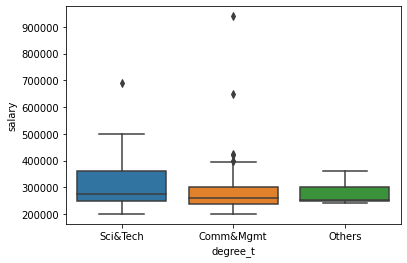

In [34]:
sns.boxplot(x = 'degree_t' , y = 'salary' , data = df.loc[df['salary'] != 0])

Salaries for Sci&tech are higher than the other two streams.

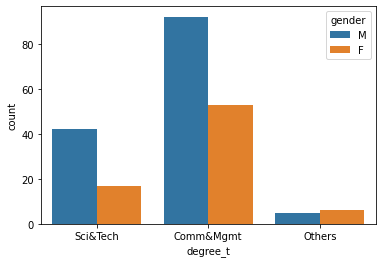

In [35]:
sns.countplot(x = 'degree_t' , data =df , hue = 'gender')

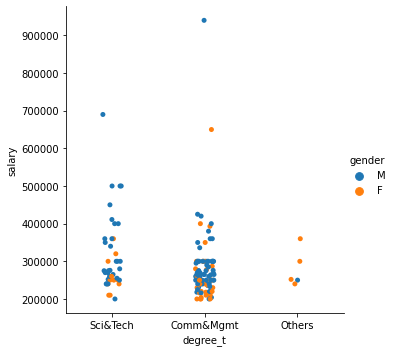

In [36]:
sns.catplot(x = 'degree_t' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

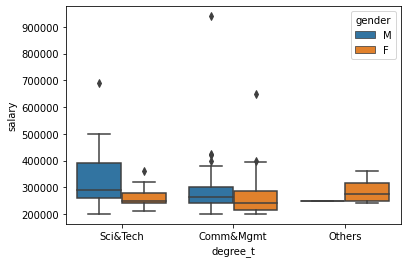

In [37]:
sns.boxplot(x = 'degree_t' , y = 'salary', hue='gender' , data = df.loc[df['salary'] != 0])

For Science the salary range is bigger  than other categories.Salaries are more in science as compared to commerce.

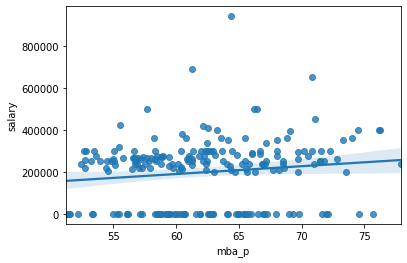

In [38]:
sns.regplot(x = 'mba_p', y = 'salary' , data = df)

There is no significant relation seen for mba percentage and salary.

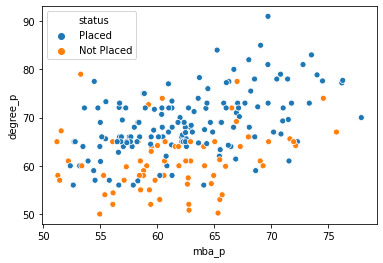

In [39]:
sns.scatterplot(x = 'mba_p' , y = 'degree_p' , data = df , hue = 'status' )

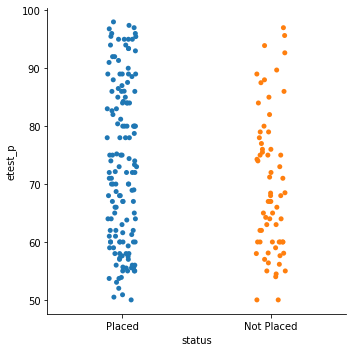

In [40]:
sns.catplot(x = 'status' , y = 'etest_p' , data = df )

Etest scores are not that different for placed and unplaced students.We can check mean score though.

In [41]:
df[['status','etest_p']].groupby('status').mean()

,etest_p
status,
Not Placed,69.587910
Placed,73.238041


As we can see mean is also almost same so Placement is not that affected by etest score

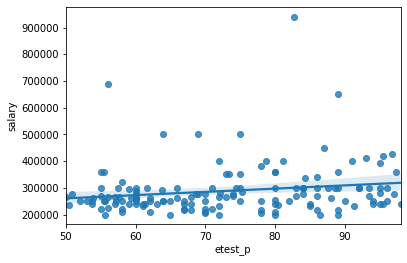

In [42]:
sns.regplot(x = 'etest_p' , y = 'salary' , data = df.loc[df['salary'] != 0])

The relation is not that significant for etest score and salary.

In [43]:
df_specialisation_analysis =  df[['specialisation','status']].groupby(['specialisation'], as_index = False).count()
df_specialisation_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['specialisation'],as_index = False).count()
df_specialisation_analysis['Placed'] = df_specialisation_analysis1['status']
df_specialisation_analysis['Placed_Percent'] = df_specialisation_analysis['Placed']/df_specialisation_analysis['status']*100
df_specialisation_analysis.rename(columns = {'specialisation':'MBA_specialisation' , 'status':'Total_Students'})

,MBA_specialisation,Total_Students,Placed,Placed_Percent
0,Mkt&Fin,120,95,79.166667
1,Mkt&HR,95,53,55.789474


More students from Marketting and finance got placed as compared to  Marketting and HR.There is more demand for the former specialisation.

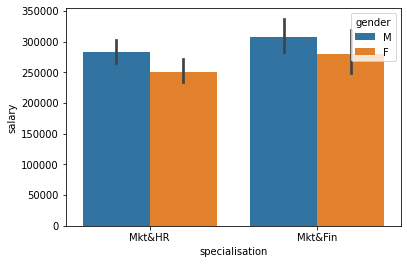

In [44]:
sns.barplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

Mean Salary difference is not that significant for different specialisation in MBA and even among genders.Thogh salaries are higher in finance as compared to HR and it also supports our observation above that demand is more in finance.Male employees earn more than females.

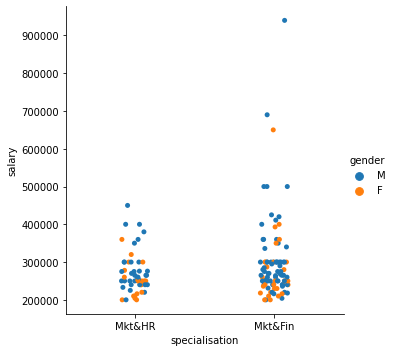

In [45]:
sns.catplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

Lets Do Label Encoding :


In [46]:
df = pd.get_dummies(df,columns = ['status'])
df = pd.get_dummies(df,columns = ['specialisation'])
df = pd.get_dummies(df,columns = ['gender'])
#df['status'] = le.fit_transform(df['status'])

#df_dummy.rename()

In [47]:

df.rename(columns = {'status_Not Placed':'Not Placed' , 'status_Placed':'Placed' ,
                    'specialisation_Mkt&Fin':'Marketting and Finance' , 'specialisation_Mkt&HR':'Marketting and HR',
                    'gender_F':'Female' , 'gender_M':'Male'}, inplace =True)

In [48]:
df.corrwith(df['Placed'])

sl_no                    -0.026859
ssc_p                     0.607889
hsc_p                     0.491228
degree_p                  0.479861
etest_p                   0.127639
mba_p                     0.076922
salary                    0.865774
Not Placed               -1.000000
Placed                    1.000000
Marketting and Finance    0.250655
Marketting and HR        -0.250655
Female                   -0.090670
Male                      0.090670
dtype: float64

SSC_percentage matters the most for getting a placement as it is highly correlated with Placement.

As we can see from above analysis , the  factors affecting placement are :
MBA specialisation , Degree Stream ,HSC_subject , Work Experience ,Degree percentage , ssc percentage ,Gender and hsc percentage

As per this dataset Males got more placement and higher salaries than females.

* MBA Specialization: Finance Department has higher placements and higher salaries
* Work Experience : People having workexperience are more likely of getting placed with higer salaries.
* Degree Percentage : Having more percentage can increase chances of placement but won't impact salary much
* Degree Stream : Science and commerce students get placed more as compared to arts .Salaries are higher for science than other streams.
* Having Higher HSC and SSC percentage can increase your chances of getting placed although boards don't play an important role in getting a placement 
* Males are getting more placements and higher salaries than females.


Percentage matters for getting a placement.SSC percentage has greatest influence on placement



